In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
file_path  = r'D:\heart_attack_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Display summary statistics
summary_stats = df.describe()
print(summary_stats)


               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

In [2]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [3]:
df.columns  

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

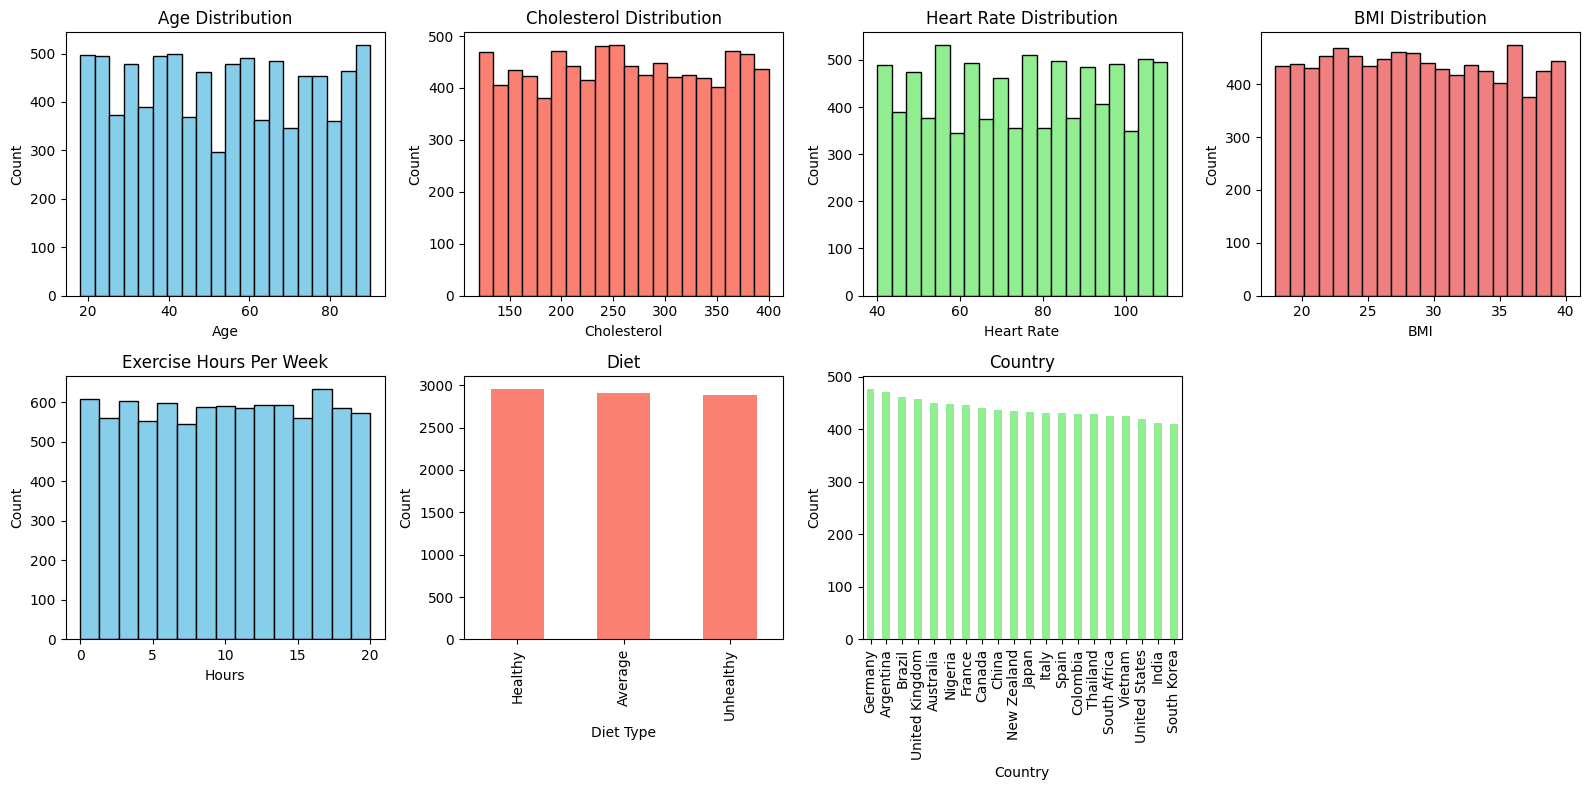

In [4]:
# Create subplots for histograms
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Histograms for Age, Cholesterol, Heart Rate, and BMI
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

axes[0, 1].hist(df['Cholesterol'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Cholesterol Distribution')
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_ylabel('Count')

axes[0, 2].hist(df['Heart Rate'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Heart Rate Distribution')
axes[0, 2].set_xlabel('Heart Rate')
axes[0, 2].set_ylabel('Count')

axes[0, 3].hist(df['BMI'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 3].set_title('BMI Distribution')
axes[0, 3].set_xlabel('BMI')
axes[0, 3].set_ylabel('Count')

# Histogram for Exercise Hours Per Week
axes[1, 0].hist(df['Exercise Hours Per Week'], bins=15, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Exercise Hours Per Week')
axes[1, 0].set_xlabel('Hours')
axes[1, 0].set_ylabel('Count')

# Histogram for Diet
df['Diet'].value_counts().plot(kind='bar', ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Diet')
axes[1, 1].set_xlabel('Diet Type')
axes[1, 1].set_ylabel('Count')

# Histogram for Country
df['Country'].value_counts().plot(kind='bar', ax=axes[1, 2], color='lightgreen')
axes[1, 2].set_title('Country')
axes[1, 2].set_xlabel('Country')
axes[1, 2].set_ylabel('Count')

# Remove empty subplot
axes[1, 3].remove()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


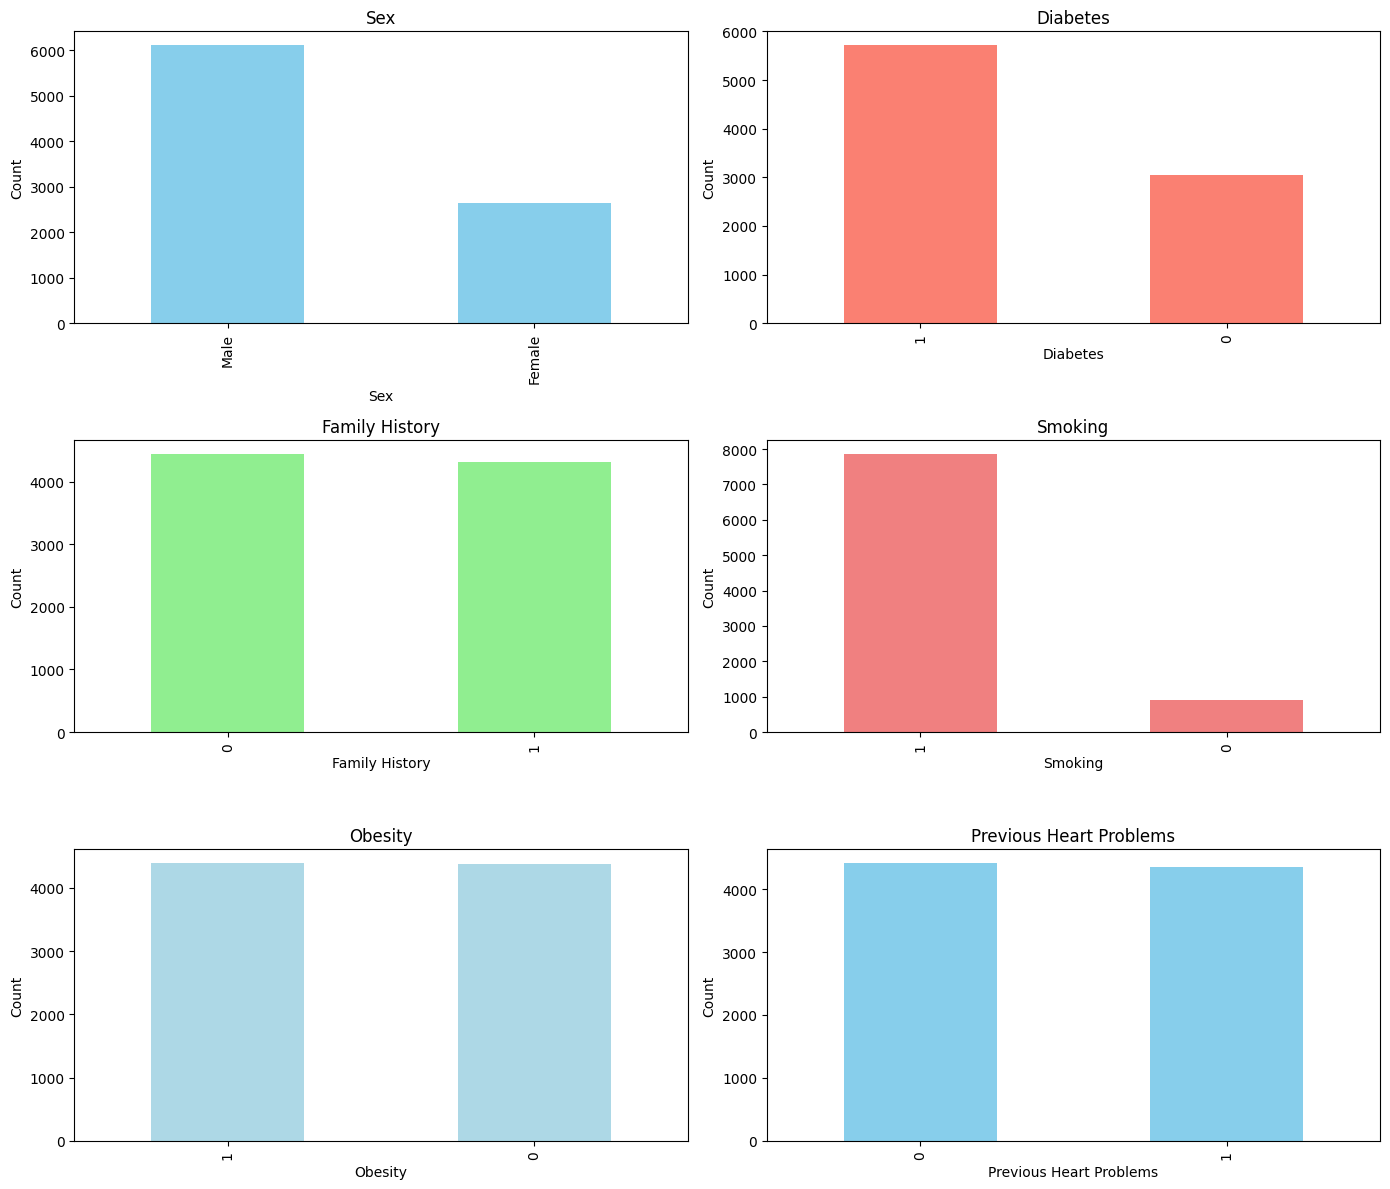

In [5]:
# Create a figure and subplots for count plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Count plots for Sex, Diabetes, Family History, Smoking, Obesity, and Previous Heart Problems
df['Sex'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Sex')
axes[0, 0].set_ylabel('Count')

df['Diabetes'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Diabetes')
axes[0, 1].set_ylabel('Count')

df['Family History'].value_counts().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Family History')
axes[1, 0].set_ylabel('Count')

df['Smoking'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Smoking')
axes[1, 1].set_ylabel('Count')

df['Obesity'].value_counts().plot(kind='bar', ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('Obesity')
axes[2, 0].set_ylabel('Count')

df['Previous Heart Problems'].value_counts().plot(kind='bar', ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Previous Heart Problems')
axes[2, 1].set_ylabel('Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


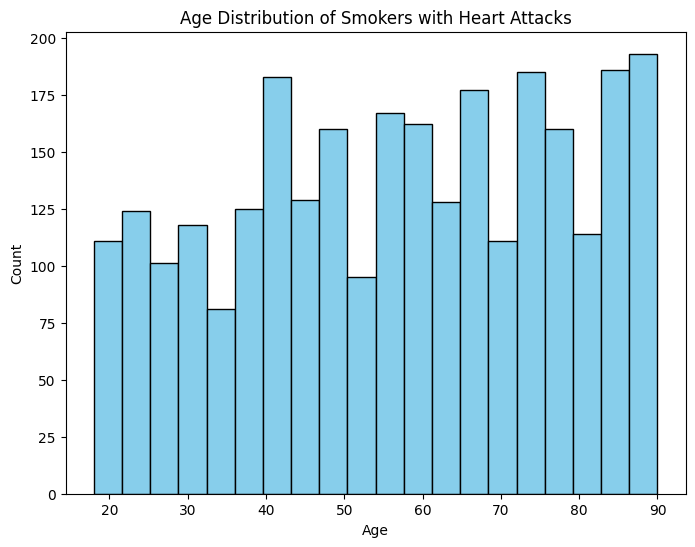

In [6]:
# Create a histogram for the age distribution of smokers with heart attacks
smokers_with_heart_attack = df[(df['Smoking'] == 1) & (df['Heart Attack Risk'] == 1)]

plt.figure(figsize=(8, 6))
plt.hist(smokers_with_heart_attack['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Smokers with Heart Attacks')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

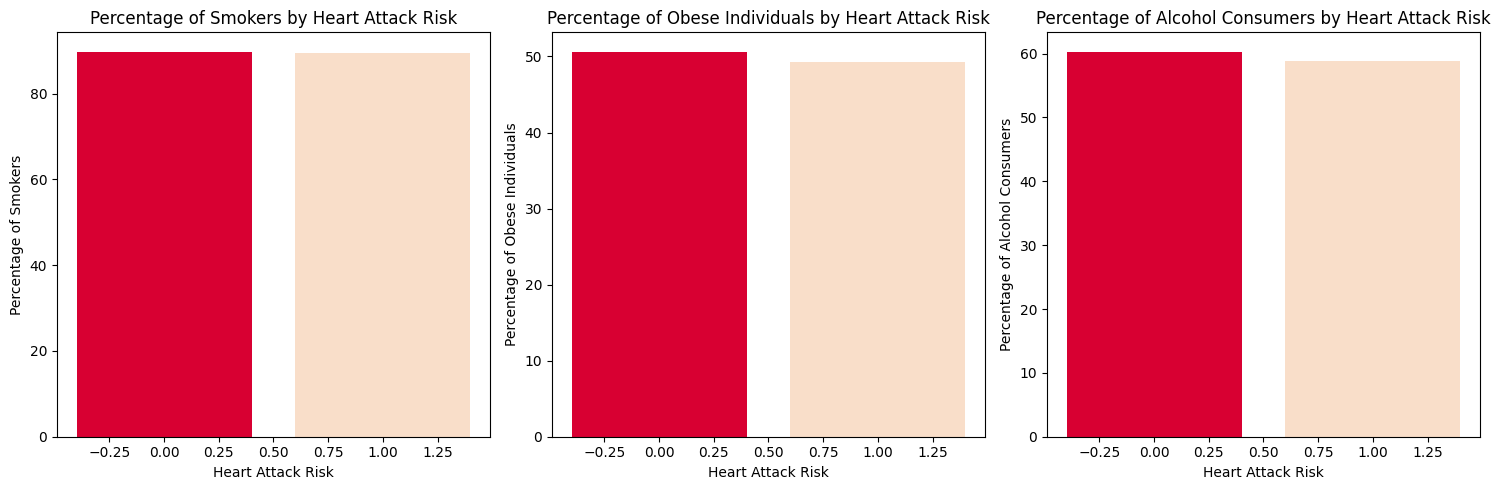

In [8]:

# Calculate percentages of smokers, obese individuals, and alcohol consumption levels by heart attack risk
heart_attack_risk_groups = df.groupby('Heart Attack Risk')
smoking_percentage = heart_attack_risk_groups['Smoking'].mean() * 100
obesity_percentage = heart_attack_risk_groups['Obesity'].mean() * 100
alcohol_percentage = heart_attack_risk_groups['Alcohol Consumption'].mean() * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar chart for smoking
axes[0].bar(smoking_percentage.index, smoking_percentage.values, color=['#D80032', '#F9DEC9'])
axes[0].set_title('Percentage of Smokers by Heart Attack Risk')
axes[0].set_xlabel('Heart Attack Risk')
axes[0].set_ylabel('Percentage of Smokers')

# Bar chart for obesity
axes[1].bar(obesity_percentage.index, obesity_percentage.values, color=['#D80032', '#F9DEC9'])
axes[1].set_title('Percentage of Obese Individuals by Heart Attack Risk')
axes[1].set_xlabel('Heart Attack Risk')
axes[1].set_ylabel('Percentage of Obese Individuals')

# Bar chart for alcohol consumption
axes[2].bar(alcohol_percentage.index, alcohol_percentage.values, color=['#D80032', '#F9DEC9'])
axes[2].set_title('Percentage of Alcohol Consumers by Heart Attack Risk')
axes[2].set_xlabel('Heart Attack Risk')
axes[2].set_ylabel('Percentage of Alcohol Consumers')

plt.tight_layout()
plt.show()

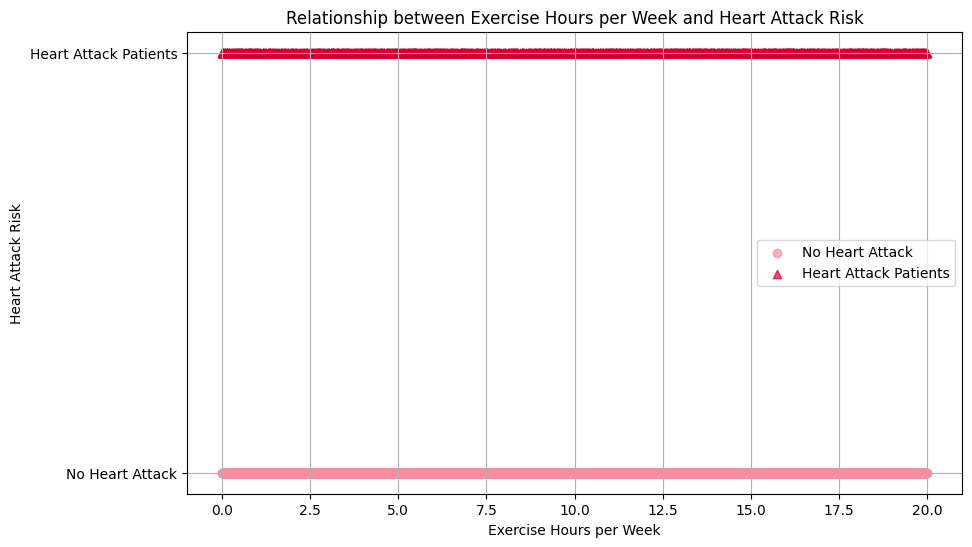

In [9]:
# Scatter plot: Relationship between Exercise Hours per Week and Heart Attack Risk
plt.figure(figsize=(10, 6))

# Separate the data into two groups: No Heart Attack and Heart Attack Patients
no_heart_attack = df[df['Heart Attack Risk'] == 0]
heart_attack = df[df['Heart Attack Risk'] == 1]

# Plot exercise hours for patients with no heart attack
plt.scatter(no_heart_attack['Exercise Hours Per Week'], [0] * len(no_heart_attack), marker='o', color='#F78CA2', label='No Heart Attack', alpha=0.7)

# Plot exercise hours for heart attack patients
plt.scatter(heart_attack['Exercise Hours Per Week'], [1] * len(heart_attack), marker='^', color='#D80032', label='Heart Attack Patients', alpha=0.7)

plt.title('Relationship between Exercise Hours per Week and Heart Attack Risk')
plt.xlabel('Exercise Hours per Week')
plt.ylabel('Heart Attack Risk')
plt.yticks([0, 1], ['No Heart Attack', 'Heart Attack Patients'])
plt.legend()
plt.grid(True)
plt.show()


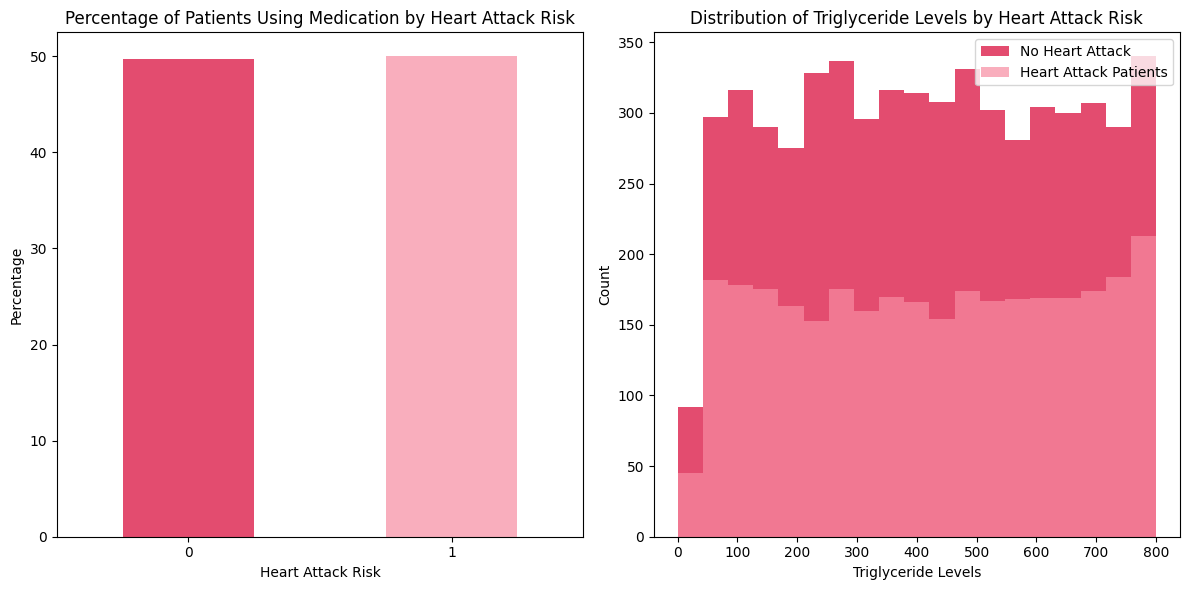

In [10]:


# Calculate the percentage of patients using medication by heart attack risk
medication_percentage = df.groupby('Heart Attack Risk')['Medication Use'].mean() * 100

# Create a bar chart for medication use
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors = ['#D80032', '#F78CA2']
medication_percentage.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Percentage of Patients Using Medication by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Create a histogram for triglyceride levels by heart attack risk
plt.subplot(1, 2, 2)
no_heart_attack_triglycerides = df[df['Heart Attack Risk'] == 0]['Triglycerides']
heart_attack_triglycerides = df[df['Heart Attack Risk'] == 1]['Triglycerides']
bins = np.linspace(0, 800, 20)  # Adjust the bin size as needed
plt.hist(no_heart_attack_triglycerides, bins, alpha=0.7, color='#D80032', label='No Heart Attack')
plt.hist(heart_attack_triglycerides, bins, alpha=0.7, color='#F78CA2', label='Heart Attack Patients')
plt.title('Distribution of Triglyceride Levels by Heart Attack Risk')
plt.xlabel('Triglyceride Levels')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


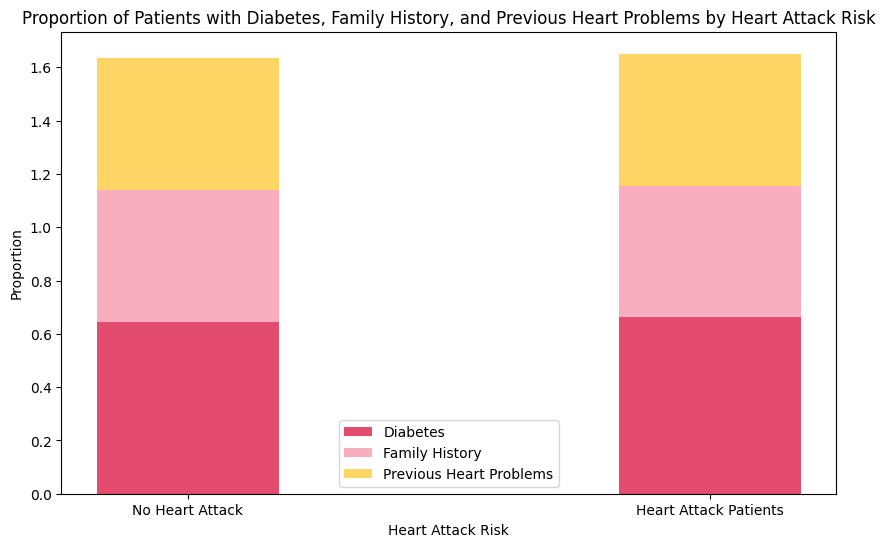

In [11]:
# Calculate proportions for each category
proportion_diabetes = []
proportion_family_history = []
proportion_previous_heart_problems = []

for risk in [0, 1]:  # 0 represents 'No Heart Attack' and 1 represents 'Heart Attack Patients'
    subset = df[df['Heart Attack Risk'] == risk]
    proportion_diabetes.append(np.mean(subset['Diabetes']))
    proportion_family_history.append(np.mean(subset['Family History']))
    proportion_previous_heart_problems.append(np.mean(subset['Previous Heart Problems']))

# Define the categories and positions for the bars
categories = ['No Heart Attack', 'Heart Attack Patients']
x = np.arange(len(categories))

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
bottom_family_diabetes = np.array(proportion_diabetes)
bottom_previous_family_diabetes = bottom_family_diabetes + np.array(proportion_family_history)

plt.bar(x, proportion_diabetes, bar_width, label='Diabetes', color='#D80032', alpha=0.7)
plt.bar(x, proportion_family_history, bar_width, label='Family History', color='#F78CA2', alpha=0.7, bottom=bottom_family_diabetes)
plt.bar(x, proportion_previous_heart_problems, bar_width, label='Previous Heart Problems', color='#FFC524', alpha=0.7, bottom=bottom_previous_family_diabetes)

# Customize the plot
plt.title('Proportion of Patients with Diabetes, Family History, and Previous Heart Problems by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Proportion')
plt.xticks(x, categories)
plt.legend()

plt.show()


In [80]:
from scipy import stats

# Create two groups for the t-test: Smokers and Non-Smokers
smokers = df[df['Smoking'] == 1]['Heart Attack Risk']
non_smokers = df[df['Smoking'] == 0]['Heart Attack Risk']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.3792037139217481
P-value: 0.7045457838624168


### Null Hypothesis: There is no difference in the 'Heart Attack Risk' between smokers and non-smokers.
### Outcome: This implies there is no significant difference in the 'Heart Attack Risk' between smokers and non-smokers.

In [14]:
from scipy.stats import ttest_ind
from scipy import stats

# Separate data into two groups: those with a heart attack and those without
heart_attack_group = df[df['Heart Attack Risk'] == 1]['Age']
no_heart_attack_group = df[df['Heart Attack Risk'] == 0]['Age']

# Perform a t-test
t_stat, p_value = ttest_ind(heart_attack_group, no_heart_attack_group)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.5993519702132762
P-value: 0.5489536967579363


### p-value is less than chosen significance level (i.e., 0.05), so we would reject the null hypothesis. suggesting that there is a significant difference in the mean age between individuals who had a heart attack and those who did not

### Performing similar Heart Attack Risk with Age

In [18]:
from scipy.stats import f_oneway

# Separate data into different groups based on 'Heart Attack Risk'
grouped_data = [df[df['Heart Attack Risk'] == risk]['Age'] for risk in df['Heart Attack Risk'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')


F-Statistic: 0.35922278419854103
P-Value: 0.5489536967626993


### There is no difference in the P-test.

### DIFFERENCE IN APPLICATION:  t-test us used for comparing two groups and ANOVA for comparing three or more groups.

### A one-way ANOVA evaluates the impact of a single factor on a dependent variable, contrasting with a two-way ANOVA, that has two distinct factors and their potential interaction on the outcome variable. The complexity in analysis increases with a two-way ANOVA as it not only considers the main effects of each factor but also explores how these factors might interact. This method, often utilized in more intricate experimental setups, contrasting with the simpler design of a one-way ANOVA, which focuses solely on one factor's effect.

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the ANOVA model
model = ols('Age ~ Cholesterol + Diabetes + Cholesterol:Diabetes', data=df).fit()

# Run the ANOVA
anova_table = anova_lm(model)

# Display the ANOVA table
print(anova_table)


                          df        sum_sq     mean_sq         F    PR(>F)
Cholesterol              1.0  3.281351e+02  328.135130  0.726698  0.393979
Diabetes                 1.0  8.010073e+02  801.007277  1.773934  0.182931
Cholesterol:Diabetes     1.0  2.142057e+02  214.205682  0.474386  0.490994
Residual              8759.0  3.955064e+06  451.542912       NaN       NaN


### The null hypothesis for ANOVA test would generally be that there's no significant effect or interaction among   Cholesterol, Diabetes and their interaction.

## P values exceed the common significance threshold of 0.05
### For Cholesterol: No significant impact of Cholestrol on the dependent variable.
### Diabetes: No substantial effect on the dependent variable.
### Internaction term (Cholesterol: Diabetes): No significant interaction effect on the dependent variable.